In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import re


In [2]:
def make_plot(results):
    plt.figure(figsize=(10,8))
    
    plt.title(results[0][2])
    
    legend = []
    
    for result in results:
        plt.plot(result[0]['average'])
        legend.append(result[1])
    
    plt.legend(legend)
    plt.xlabel("iterations")
    

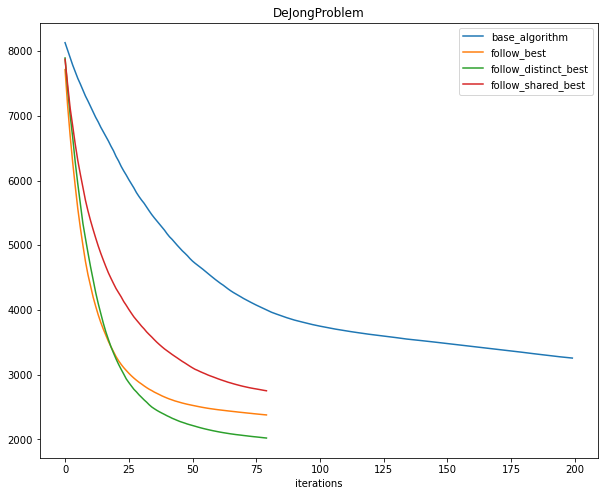

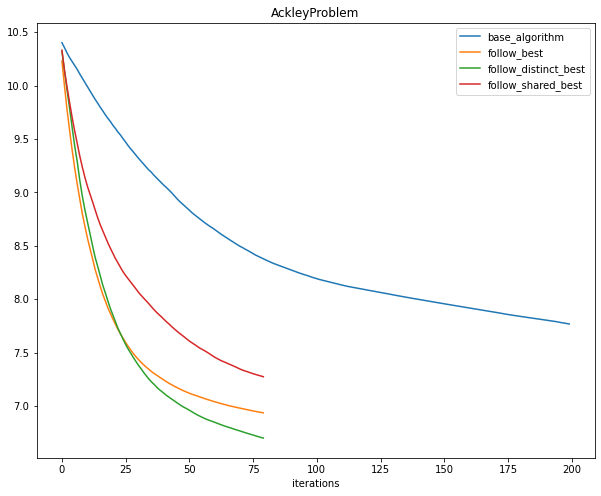

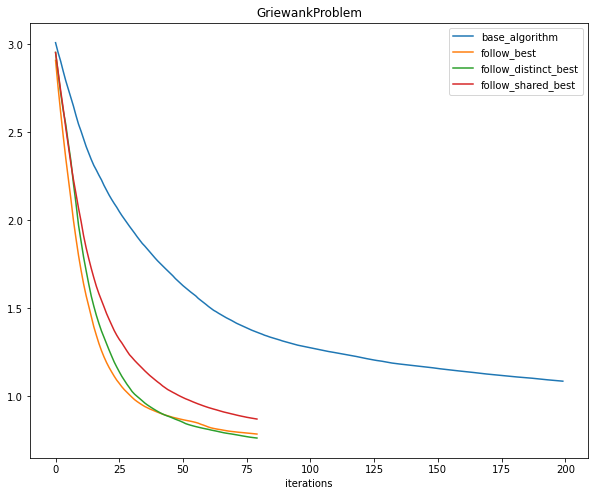

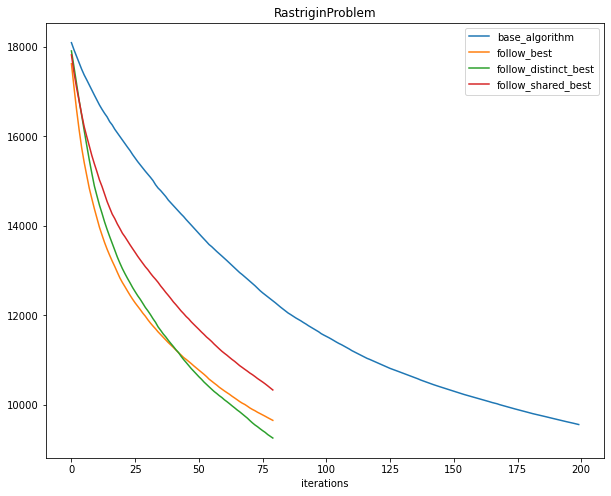

In [11]:
result_files = os.listdir('results')

results = []

for filename in result_files:
    with open(f'results/{filename}','r') as file:
        result = json.loads(file.read())
        
        alg_name = re.search(r'(.*)_[^_]*\.json',filename).group(1)
        
        problem_name = re.search(r'.*_([^_]*)\.json',filename).group(1)
                
        results.append((result, alg_name, problem_name))
        
        
problems = set(map(lambda x: x[2], results))
              
for problem in problems:
    make_plot([result for result in results if result[2] == problem])
              

